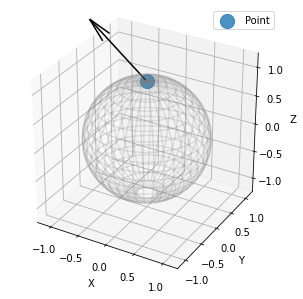

In [16]:
import numpy as np
import geomstats.visualization as viz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5)); ax = fig.add_subplot(111, projection="3d")

point = np.array([0, 0, 1]); point = point / np.linalg.norm(point)
vector = np.array([-1, 0, 0.8])
ax = viz.plot(points=point, ax=ax, space="S2", s=200, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=vector); arrow.draw(ax, color="black"); ax.legend();

In [1]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
import numpy as np

def angle_to_matrix(theta):
    res = np.array([[np.cos(theta),-1 * np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    res = res.reshape(2,2)
    return res


so_2 = SpecialOrthogonal(n=4, point_type="vector")
theta = so_2.random_point()
print(theta)
mat = so_2.matrix_from_rotation_vector(theta)
print(mat)
#manual = angle_to_matrix(theta)
#print(manual)


INFO: Using numpy backend


NotImplementedError: SO(n) is only implemented in vector representation when n = 3.

In [51]:
print(mat[2,1]-mat[1,2])

1.3988897714902562


In [31]:
# Binary operation on lie groups

so = SpecialOrthogonal(n=2, point_type="matrix")

rotation1 = so.random_point()
rotation2 = so.random_point()
composition = so.compose(rotation1, rotation2)

so.belongs(composition)

True

In [34]:
# Associativity

rotation3 = so.random_point()
print(so.compose(rotation1,
    so.compose(rotation2, rotation3)))

print(so.compose( so.compose(rotation1, rotation2), rotation3))


[[-0.96493936  0.26247291]
 [-0.26247291 -0.96493936]]
[[-0.96493936  0.26247291]
 [-0.26247291 -0.96493936]]


In [36]:
# Identity element

print("Identity Element: ", so.identity)

print(rotation3)
print(so.compose(rotation3,so.identity))
print(so.compose(so.identity, rotation3))

Identity Element:  [[1. 0.]
 [0. 1.]]
[[-0.45517189  0.89040359]
 [-0.89040359 -0.45517189]]
[[-0.45517189  0.89040359]
 [-0.89040359 -0.45517189]]
[[-0.45517189  0.89040359]
 [-0.89040359 -0.45517189]]


In [37]:
# Inverse

rotation1_inv = so.inverse(rotation1)
print(so.compose(rotation1, rotation1_inv))
print(so.compose(rotation1_inv, rotation1))

[[1.00000000e+00 6.09075281e-17]
 [6.09075281e-17 1.00000000e+00]]
[[ 1.00000000e+00 -6.09075281e-17]
 [-6.09075281e-17  1.00000000e+00]]


In [38]:
# Lie algebra

so.lie_algebra.random_point()

array([[ 0.        , -0.86832056],
       [ 0.86832056,  0.        ]])

In [2]:
from geomstats.geometry.special_euclidean import SpecialEuclidean
import numpy as np
help(SpecialEuclidean)

INFO: Using numpy backend


Help on class SpecialEuclidean in module geomstats.geometry.special_euclidean:

class SpecialEuclidean(builtins.object)
 |  SpecialEuclidean(n, point_type='matrix', epsilon=0.0)
 |  
 |  Class for the special Euclidean groups(2).
 |  
 |  Parameters
 |  ----------
 |  n : int
 |      Integer representing the shapes of the matrices : n x n.
 |  point_type : str, {\'vector\', \'matrix\'}
 |      Representation of the elements of the group.
 |      Optional, default: 'matrix',
 |  epsilon : float
 |      Precision used for calculations involving potential divison by 0 in
 |      rotations.
 |      Optional, default: 0.
 |  
 |  Static methods defined here:
 |  
 |  __new__(cls, n, point_type='matrix', epsilon=0.0)
 |      Instantiate a special Euclidean group.
 |      
 |      Select the object to instantiate depending on the point_type.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary f

# Metrics

In [3]:
import numpy as np

from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

sphere = Hypersphere(dim=2)
so3 = SpecialOrthogonal(n=3)
print(sphere.metric)
print(so3.metric)

In [20]:
# geodesic

sphere = Hypersphere(dim=2)

point = np.array([0, 0, 1])
point = point / np.linalg.norm(point)

vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point) #makes a tangent vector at the spec.point and along the spec. vector

result = sphere.metric.geodesic(
    initial_tangent_vec=tangent_vector,
    initial_point=point
)  #result is a function
print(result)
points_on_geodesic = result(np.linspace(0.0, 1.0, 130))

<function Connection.geodesic.<locals>.path at 0x15c765e50>


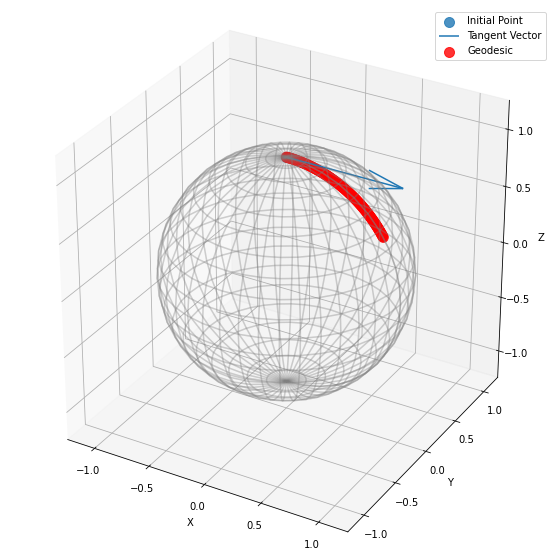

In [22]:
# Visualizing it

import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Initial Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Tangent Vector")
ax = viz.plot(points_on_geodesic, ax=ax, space="S2", s=100, alpha=0.8, label="Geodesic", color="red")
ax.legend();

In [ ]:
# Discrete curves manifold using cells (in class example)

[0.75316523 0.65546847 0.05570653]


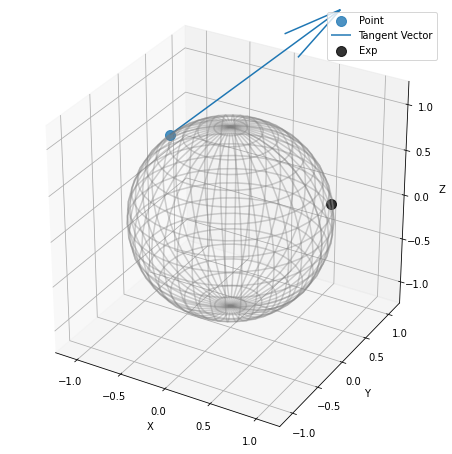

In [30]:
# addition -> exponential

import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

import matplotlib.pyplot as plt
import geomstats.visualization as viz

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812]); point = point / np.linalg.norm(point)
vector = np.array([1, 1.5, 1])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)
print(result)
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Tangent Vector")
ax = viz.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Exp", color="black")
ax.legend();


[ 1.57079633e+00  0.00000000e+00 -9.61835347e-17]


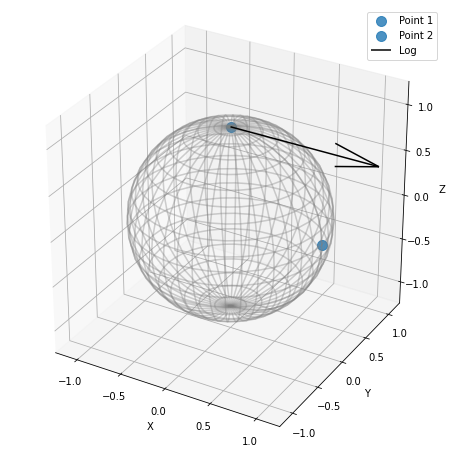

In [36]:
# subtraction -> logarithm

import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

import matplotlib.pyplot as plt
import geomstats.visualization as viz


sphere = Hypersphere(dim=2)

point1 = np.array([0.0, 0.0, 1.0]); point1 /= np.linalg.norm(point1)
point2 = np.array([1.0, 0.0, 0.0]); point2 /= np.linalg.norm(point2)

result = sphere.metric.log(point2, base_point=point1)
print(result)

fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point1, ax=ax, space="S2", s=100, alpha=0.8, label="Point 1", c="C0")
ax = viz.plot(point2, ax=ax, space="S2", s=100, alpha=0.8, label="Point 2", c="C0")
arrow = viz.Arrow3D(point1, vector=result); arrow.draw(ax, color="black", label="Log")
ax.legend();

# HW-1

In [48]:
import numpy as np
from geomstats.geometry.special_euclidean import SpecialEuclidean as SE

SE_3 = SE(n=2, point_type="vector")  #without point_type, defaults to matrix
random_pt = SE_3.random_point()
random_pt_mat = SE_3.matrix_from_vector(random_pt)
print(random_pt)
print(random_pt_mat)

[ 0.62910459  0.06869595 -0.01366252]


In [51]:
# Testing visualization for SE(2) (already in geomstats)

import numpy as np
from geomstats.geometry.special_euclidean import SpecialEuclidean
import geomstats.visualization as visualization


print(np.zeros((3,3)))




[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
